In [40]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to save the trained scaler class
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


In [41]:
data_features = pd.read_csv("../research_notebooks/data/md_raw_dataset.csv", sep=";", index_col=False)

#rename first column
data_features.rename(columns = {"Unnamed: 0":"index"}, inplace=True)

#get important information
print(data_features.columns)

# rows and columns of the data
print(data_features.shape)

#rename first column
data_features.head(5)

Index(['index', 'when', 'super_hero_group', 'tracking', 'place',
       'tracking_times', 'crystal_type', 'Unnamed: 7', 'human_behavior_report',
       'human_measure', 'crystal_weight', 'expected_factor_x',
       'previous_factor_x', 'first_factor_x', 'expected_final_factor_x',
       'final_factor_x', 'previous_adamantium', 'Unnamed: 17',
       'etherium_before_start', 'expected_start', 'start_process',
       'start_subprocess1', 'start_critical_subprocess1',
       'predicted_process_end', 'process_end', 'subprocess1_end',
       'reported_on_tower', 'opened', 'chemical_x', 'raw_kryptonite', 'argon',
       'pure_seastone', 'crystal_supergroup', 'Cycle', 'groups'],
      dtype='object')
(9592, 35)


,index,when,super_hero_group,tracking,place,tracking_times,crystal_type,Unnamed: 7,human_behavior_report,human_measure,crystal_weight,expected_factor_x,previous_factor_x,first_factor_x,expected_final_factor_x,final_factor_x,previous_adamantium,Unnamed: 17,etherium_before_start,expected_start,start_process,start_subprocess1,start_critical_subprocess1,predicted_process_end,process_end,subprocess1_end,reported_on_tower,opened,chemical_x,raw_kryptonite,argon,pure_seastone,crystal_supergroup,Cycle,groups
0,0,09/07/2020,D,84921,1,1,group 27,2,3,650,345.2483,1616,1624.000000,1597.0,1577.0,1578.0,0.0650,1597.0,3.07599998,09/07/2020 13:10,09/07/2020 13:08,09/07/2020 13:11,09/07/2020 13:13,09/07/2020 13:41,09/07/2020 13:28,09/07/2020 13:27,09/07/2020 13:37,44021.58091,15.850000,693.0,0.0,49.51,0,2ª,0.0
1,1,09/07/2020,D,84941,1,1,group 56,1,4,700,350.6301,1610,1630.300049,1595.0,1565.0,1572.0,0.0309,1595.0,NaN,09/07/2020 15:08,09/07/2020 15:11,09/07/2020 15:16,09/07/2020 15:18,09/07/2020 15:49,09/07/2020 15:39,09/07/2020 15:38,09/07/2020 15:53,44021.6737,21.966667,3570.0,0.0,99.94,0,2ª,0.0
2,2,09/07/2020,D,84951,1,1,group 56,2,4,800,347.4298,1609,1638.099976,1608.0,1565.0,1568.0,NaN,1608.0,NaN,09/07/2020 16:15,09/07/2020 16:16,09/07/2020 16:20,09/07/2020 16:22,09/07/2020 16:54,09/07/2020 16:42,09/07/2020 16:41,09/07/2020 16:54,44021.70867,21.166667,7950.0,0.0,91.49,0,2ª,0.0
3,3,09/07/2020,D,84971,1,1,group 56,7,3,700,333.1576,1622,1614.099976,1587.0,1571.0,1576.0,0.0520,1587.0,NaN,09/07/2020 18:22,09/07/2020 18:24,09/07/2020 18:31,09/07/2020 18:33,09/07/2020 19:02,09/07/2020 18:47,09/07/2020 18:47,09/07/2020 18:55,09/07/2020 19:02,15.250000,807.0,0.0,NaN,0,2ª,0.0
4,4,09/07/2020,D,84981,1,1,group 27,17,3,700,362.3764,1620,1618.199951,1599.0,1579.0,1590.0,0.2800,1599.0,NaN,09/07/2020 19:14,09/07/2020 19:12,09/07/2020 19:16,NaN,09/07/2020 20:13,09/07/2020 19:37,09/07/2020 19:37,09/07/2020 19:47,09/07/2020 20:20,20.566667,NaN,0.0,509.19,0,2ª,0.0


In [42]:
target = pd.read_csv("../research_notebooks/data/md_target_dataset.csv", sep=";")

#get important information
print(target.columns)

# rows and columns of the data
print(target.shape)

#remove first column
target.head(5)

Index(['index', 'groups', 'target'], dtype='object')
(9589, 3)


,index,groups,target
0,1,0,1.233766
1,2,0,2.467532
2,3,0,3.701299
3,4,0,4.935065
4,5,0,6.168831


In [43]:
data_features.groups = data_features.groups.astype("int64", errors="ignore")

data_features = data_features.loc[~data_features.groups.isnull(), :]
data = pd.merge(data_features, target, how="inner", on=["groups","index"])

print(data_features.shape)
print(target.shape)
print(data.shape)

(9590, 35)
(9589, 3)
(8544, 36)


In [44]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['target'], axis=1), # predictive variables
    data['target'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((7689, 35), (855, 35))

# Feature Engineering

In the following cells, we will engineer the variables of the Dataset so that we tackle:

- Missing values
- Temporal variables
- Non-Gaussian distributed variables
- Categorical variables: remove rare labels
- Categorical variables: convert strings to numbers
- Put the variables in a similar scale

In [45]:
from numpy import NaN

temp_vars = ["when", "expected_start", "start_process", "start_subprocess1", "start_critical_subprocess1", "predicted_process_end", "process_end", "subprocess1_end", "reported_on_tower", "opened"]

for var in temp_vars:
    X_train.loc[pd.to_datetime(X_train[var], utc=True, errors="coerce").isna(), var] = NaN
    X_test.loc[pd.to_datetime(X_test[var], utc=True, errors="coerce").isna(), var] = NaN

for var in temp_vars:
    X_train[var] = pd.to_datetime(X_train[var])
    X_test[var] = pd.to_datetime(X_test[var])

/Users/pdanninger/opt/miniconda3/envs/Best_Practice_env/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '22/10/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/pdanninger/opt/miniconda3/envs/Best_Practice_env/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/pdanninger/opt/miniconda3/envs/Best_Practice_env/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30/07/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/pdanninger/opt/miniconda3/e

In [46]:
def elapsed_time(df, var, var1, var2):
    # capture time difference between two variables
    df[var] = (df[var1] - df[var2]).dt.seconds/60
    df[var].astype("Int64")
    return df

In [47]:
X_train = elapsed_time(X_train, "diff_subprocess1", "subprocess1_end", "start_subprocess1")
X_test = elapsed_time(X_test, "diff_subprocess1", "subprocess1_end", "start_subprocess1")

X_train = elapsed_time(X_train, "diff_expected", "predicted_process_end", "expected_start")
X_test = elapsed_time(X_test, "diff_expected", "predicted_process_end", "expected_start")

X_train = elapsed_time(X_train, "diff_process", "process_end", "start_process")
X_test = elapsed_time(X_test, "diff_process", "process_end", "start_process")

X_train.drop(["start_subprocess1", "subprocess1_end", "expected_start", "predicted_process_end", "start_process", "process_end"], axis=1, inplace=True)
X_test.drop(["start_subprocess1", "subprocess1_end", "expected_start", "predicted_process_end", "start_process", "process_end"], axis=1, inplace=True)

In [48]:
#Split remaining time columns into useful columns
def split_datetime(df, var, date_or_dt):
    if date_or_dt == "date":
        df["year_" + str(var)] = df[var].dt.year
        df["month_" + str(var)] = df[var].dt.month
        df["day_" + str(var)] = df[var].dt.day
    else:
        df["year_" + str(var)] = df[var].dt.year
        df["month_" + str(var)] = df[var].dt.month
        df["day_" + str(var)] = df[var].dt.day
        df["hour_" + str(var)] = df[var].dt.hour
        df["minute_" + str(var)] = df[var].dt.minute
        df["second_" + str(var)] = df[var].dt.second
    
    df.drop([var], axis=1, inplace=True)
    return df

In [49]:
X_train = split_datetime(X_train, "when", date_or_dt="date")
X_test = split_datetime(X_test, "when", date_or_dt="date")

X_train = split_datetime(X_train, "start_critical_subprocess1", date_or_dt="datetime")
X_test = split_datetime(X_test, "start_critical_subprocess1", date_or_dt="datetime")

X_train = split_datetime(X_train, "reported_on_tower", date_or_dt="datetime")
X_test = split_datetime(X_test, "reported_on_tower", date_or_dt="datetime")

X_train = split_datetime(X_train, "opened", date_or_dt="datetime")
X_test = split_datetime(X_test, "opened", date_or_dt="datetime")

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7689 entries, 2709 to 2732
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              7689 non-null   int64  
 1   super_hero_group                   7689 non-null   object 
 2   tracking                           7689 non-null   int64  
 3   place                              7689 non-null   int64  
 4   tracking_times                     7689 non-null   int64  
 5   crystal_type                       7689 non-null   object 
 6   Unnamed: 7                         7689 non-null   int64  
 7   human_behavior_report              7689 non-null   int64  
 8   human_measure                      7689 non-null   int64  
 9   crystal_weight                     7478 non-null   float64
 10  expected_factor_x                  7689 non-null   int64  
 11  previous_factor_x                  7689 non-null   fl

In [51]:
#Cast etherium as float64

X_train.etherium_before_start = X_train.etherium_before_start.astype("float64")
X_test.etherium_before_start = X_test.etherium_before_start.astype("float64")

In [52]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [53]:
cat_vars = [var for var in X_train.columns if X_train[var].dtype == "O"]

cat_vars = cat_vars + ["index", "place", "Unnamed: 7", "human_behavior_report", "groups", "tracking_times"]

# cast all variables as categorical
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

# number of categorical variables
print(cat_vars)

['super_hero_group', 'crystal_type', 'crystal_supergroup', 'Cycle', 'index', 'place', 'Unnamed: 7', 'human_behavior_report', 'groups', 'tracking_times']


In [54]:
# make a list of the categorical variables that contain missing values

cat_vars_with_na = [
    var for var in cat_vars
    if X_train[var].isnull().sum() > 0
]

# print percentage of missing values per variable
X_train[cat_vars_with_na ].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [55]:
# variables to impute with the string missing
with_string_missing = [
    var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.1]

# variables to impute with the most frequent category
with_frequent_category = [
    var for var in cat_vars_with_na if X_train[var].isnull().mean() < 0.1]

In [56]:
print(with_string_missing)
print(with_frequent_category)

[]
[]


In [57]:
# replace missing values with new label: "Missing"

X_train[with_string_missing] = X_train[with_string_missing].fillna('Missing')
X_test[with_string_missing] = X_test[with_string_missing].fillna('Missing')

In [58]:
for var in with_frequent_category:
    
    # there can be more than 1 mode in a variable
    # we take the first one with [0]    
    mode = X_train[var].mode()[0]
    
    print(var, mode)
    
    X_train[var].fillna(mode, inplace=True)
    X_test[var].fillna(mode, inplace=True)

In [59]:
# check that we have no missing information in the engineered variables

X_train[cat_vars_with_na].isnull().sum()


Series([], dtype: float64)

In [60]:
# check that test set does not contain null values in the engineered variables

[var for var in cat_vars_with_na if X_test[var].isnull().sum() > 0]

[]

In [61]:
# now let's identify the numerical variables

num_vars = [
    var for var in X_train.columns if var not in cat_vars
]

# number of numerical variables
len(num_vars)

39

In [62]:
# make a list with the numerical variables that contain missing values
vars_with_na = [
    var for var in num_vars
    if X_train[var].isnull().sum() > 0
]

# print percentage of missing values per variable
X_train[vars_with_na].isnull().mean().sort_values(ascending=False)

etherium_before_start                0.675510
raw_kryptonite                       0.473404
day_start_critical_subprocess1       0.319157
month_start_critical_subprocess1     0.319157
second_start_critical_subprocess1    0.319157
minute_start_critical_subprocess1    0.319157
hour_start_critical_subprocess1      0.319157
year_start_critical_subprocess1      0.319157
pure_seastone                        0.108076
minute_opened                        0.044739
hour_opened                          0.044739
day_opened                           0.044739
month_opened                         0.044739
year_opened                          0.044739
second_opened                        0.044739
argon                                0.036286
previous_adamantium                  0.030433
diff_expected                        0.030303
crystal_weight                       0.027442
year_reported_on_tower               0.020679
month_reported_on_tower              0.020679
day_reported_on_tower             

In [63]:
# replace missing values as we described above

for var in vars_with_na:

    # calculate the mean using the train set
    mean_val = X_train[var].mean()
    
    print(var, mean_val)

    # add binary missing indicator (in train and test)
    X_train[var + '_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var + '_na'] = np.where(X_test[var].isnull(), 1, 0)

    # replace missing values by the mean
    # (in train and test)
    X_train[var].fillna(mean_val, inplace=True)
    X_test[var].fillna(mean_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

crystal_weight 341.94889616207485
first_factor_x 1593.7066287532573
final_factor_x 1580.8758024539452
previous_adamantium 0.13446315224681388
Unnamed: 17 1593.7066287532573
etherium_before_start 441.51025331497766
chemical_x 30.24571817147272
raw_kryptonite 2331.607310447024
argon 142.7051632185535
pure_seastone 385.0847987751533
diff_subprocess1 29.720810846386733
diff_expected 45.81410944206009
diff_process 38.968632044774175
year_start_critical_subprocess1 2019.7276026743075
month_start_critical_subprocess1 6.289207258834766
day_start_critical_subprocess1 15.245081184336199
hour_start_critical_subprocess1 11.312702960840497
minute_start_critical_subprocess1 29.910792741165235
second_start_critical_subprocess1 0.0
year_reported_on_tower 2019.7148738379815
month_reported_on_tower 6.509428950863214
day_reported_on_tower 15.392430278884461
hour_reported_on_tower 11.465737051792829
minute_reported_on_tower 29.666666666666668
second_reported_on_tower 0.0
year_opened 2019.7155888359428
mon

crystal_weight                       0
first_factor_x                       0
final_factor_x                       0
previous_adamantium                  0
Unnamed: 17                          0
etherium_before_start                0
chemical_x                           0
raw_kryptonite                       0
argon                                0
pure_seastone                        0
diff_subprocess1                     0
diff_expected                        0
diff_process                         0
year_start_critical_subprocess1      0
month_start_critical_subprocess1     0
day_start_critical_subprocess1       0
hour_start_critical_subprocess1      0
minute_start_critical_subprocess1    0
second_start_critical_subprocess1    0
year_reported_on_tower               0
month_reported_on_tower              0
day_reported_on_tower                0
hour_reported_on_tower               0
minute_reported_on_tower             0
second_reported_on_tower             0
year_opened              

In [64]:
# check that test set does not contain null values in the engineered variables

[var for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

# Transform variables

In [65]:
for var in ["crystal_weight", "chemical_x", "final_factor_x", "pure_seastone"]:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [66]:
# check that test set does not contain null values in the engineered variables
[var for var in ["crystal_weight", "chemical_x", "final_factor_x", "pure_seastone"] if X_test[var].isnull().sum() > 0]

[]

In [67]:
# same for train set
[var for var in ["crystal_weight", "chemical_x", "final_factor_x", "pure_seastone"] if X_train[var].isnull().sum() > 0]

[]

# Removing Rare Labels

For the not integer based categorical variables, we will group those categories that are present in less than 1% of the observations. That is, all values of categorical variables that are shared by less than 1% of data points, well be replaced by the string "Rare".

In [68]:
#categorical with qualitative variables

cat_others = ["super_hero_group", "crystal_type", "Cycle"]

In [69]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the entries in the dataset

    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_others:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    print(var, frequent_ls)
    print()
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

super_hero_group Index(['A', 'B', 'C', 'D', 'G', 'W', 'Y'], dtype='object', name='super_hero_group')

crystal_type Index(['group 1', 'group 112', 'group 145', 'group 155', 'group 160',
       'group 180', 'group 183', 'group 184', 'group 186', 'group 190',
       'group 196', 'group 197', 'group 2', 'group 202', 'group 203',
       'group 204', 'group 22', 'group 27', 'group 29', 'group 3', 'group 35',
       'group 5', 'group 56', 'group 67', 'group 7', 'group 70', 'group 78',
       'group 92'],
      dtype='object', name='crystal_type')

Cycle Index(['131', '1ª', '2ª', '3ª'], dtype='object', name='Cycle')



In [70]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean target value

def replace_categories(train, test, y_train, var, target):
    
    tmp = pd.concat([X_train, y_train], axis=1)
    
    # order the categories in a variable from that with the lowest
    # target value, to that with the highest
    ordered_labels = tmp.groupby([var])[target].mean().sort_values().index
    print(ordered_labels)

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    
    print(var, ordinal_label)
    print()

    # use the dictionary to replace the categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [71]:
for var in cat_others:
    replace_categories(X_train, X_test, y_train, var, 'target')

Index(['Y', 'W', 'G', 'D', 'C', 'B', 'A', 'Rare'], dtype='object', name='super_hero_group')
super_hero_group {'Y': 0, 'W': 1, 'G': 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6, 'Rare': 7}

Index(['group 27', 'group 1', 'group 3', 'group 160', 'group 180', 'group 67',
       'group 190', 'group 56', 'group 7', 'group 5', 'group 196', 'group 2',
       'group 145', 'group 184', 'group 22', 'group 203', 'group 29',
       'group 202', 'Rare', 'group 112', 'group 78', 'group 35', 'group 204',
       'group 155', 'group 70', 'group 197', 'group 186', 'group 183',
       'group 92'],
      dtype='object', name='crystal_type')
crystal_type {'group 27': 0, 'group 1': 1, 'group 3': 2, 'group 160': 3, 'group 180': 4, 'group 67': 5, 'group 190': 6, 'group 56': 7, 'group 7': 8, 'group 5': 9, 'group 196': 10, 'group 2': 11, 'group 145': 12, 'group 184': 13, 'group 22': 14, 'group 203': 15, 'group 29': 16, 'group 202': 17, 'Rare': 18, 'group 112': 19, 'group 78': 20, 'group 35': 21, 'group 204': 22, 'group 155

In [72]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [73]:
# check absence of na in the test set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

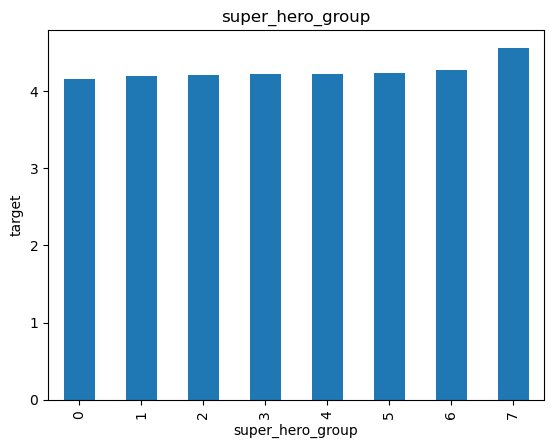

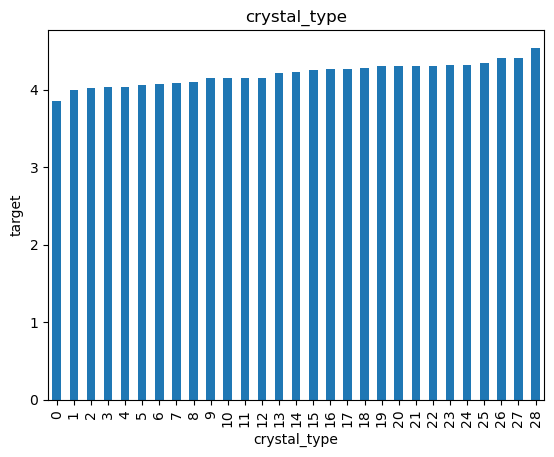

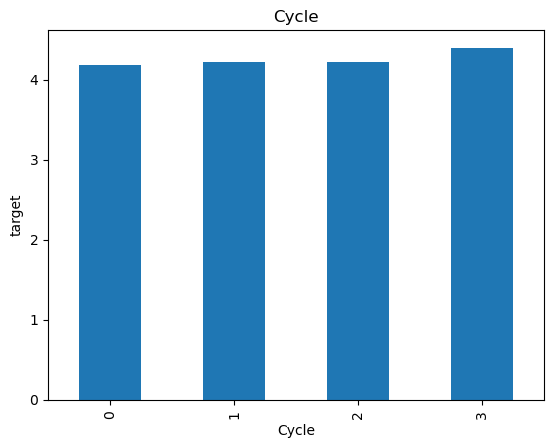

In [74]:
# show monotonic relationship between labels and target

def analyse_vars(train, y_tr, var):
    
    # function plots median target value per encoded
    # category
    
    tmp = pd.concat([train, y_tr], axis=1)
    
    tmp.groupby(var)['target'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('target')
    plt.show()
    
for var in cat_others:
    analyse_vars(X_train, y_train, var)

# Feature scaling

In [75]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set
# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

In [77]:
# save the train and test sets for the next notebook!

X_train.to_csv('preprocessed_data/xtrain.csv', index=False)
X_test.to_csv('preprocessed_data/xtest.csv', index=False)

y_train.to_csv('preprocessed_data/ytrain.csv', index=False)
y_test.to_csv('preprocessed_data/ytest.csv', index=False)

In [78]:
# save the scaler

joblib.dump(scaler, 'pipeline/minmax_scaler.joblib') 

['pipeline/minmax_scaler.joblib']